<a href="https://colab.research.google.com/github/1dgog/TC3006C_framework/blob/main/a01139500_m2_retro_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Momento de retroalimentación con framework

## Importación de librerías y dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content
/content/gdrive/MyDrive
 acertados_test.pdf	 iris.names	     scores_train.png
 acertados_train.pdf	 LiFE		     scores_train.svg
'Colab Notebooks'	'Plan de estudios'  'Servicio Social'
'Documentos utiles'	 PlayDataset.csv    'Sin ordenar'
 EBSCO			 Portugues	     test.csv
 EGSGLP			 real_estate.csv     train.csv
 Fotos			 real_state.csv      Valhalla23.csv
 gender_submission.csv	 scores_test.pdf     wine.data
 iris.data		 scores_train.pdf    wine.names


### Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # para hacer visualizacion
from sklearn.neural_network import MLPClassifier # para clasificacion
from sklearn.model_selection import train_test_split # para separacion de datos
from sklearn import metrics
from sklearn.metrics import confusion_matrix # para matrices de confusion
from sklearn.model_selection import cross_val_predict
from google.colab import files # para descargar figuras

### Nombramiento de dataset y visualización inicial

In [ ]:
columns = ["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"] # definir nombres de columna manualmente
df = pd.read_csv('wine.data',names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df = df.reset_index() # se añade un nuevo indice para que el indice previo sea una clasificación que se usara en la siguiente figura.
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  od280                 178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
   index  alcohol  mal

Se nombran los datasets de entrada y salida con el que será entrenado el modelo

In [ ]:
dfInput = df[["alcohol","malic_acid","ash","alcalinity_of_ash", "magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280","proline"]]
dfOutput = df[["index"]]

## Aplicación de redes neuronales, scores y matrices de confusion

### Separación de datos de entrenamiento, validacion y datos de prueba

In [ ]:
X_train, X_r, y_train, y_r = train_test_split(dfInput, dfOutput, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_r, y_r, random_state=0)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
26,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495
86,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780
111,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325
112,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415
94,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
56,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970


### Obtención de Scores y matrices de confusión

Se hizo un ciclo for en el que se inicia con 5 capas ocultas y va hasta cuarenta con pasos de 5.

Lo mismo para el segundo que especifica el tamaño de la capa.

Estos datos se almacenan en vectores, tanto para los datos de entrenamiento como para los de test.

In [ ]:
scores_train = []
scores_valid= []
scores_test = []
almacenamiento_conf_mat_train = []
almacenamiento_conf_mat_valid = []
almacenamiento_conf_mat_test = []

cont = 0

for ii in range (5,40, 5):
  if cont == 1:
    scores_train.append(jj_scores_train)
    scores_valid.append(jj_scores_valid) # aqui estaba el error
    scores_test.append(jj_scores_test)
    almacenamiento_conf_mat_train.append(jj_mc_train)
    almacenamiento_conf_mat_valid.append(jj_mc_valid) # aqui estaba el error
    almacenamiento_conf_mat_test.append(jj_mc_test)

  cont = 1
  
  jj_scores_train = []
  jj_scores_valid = []
  jj_scores_test = []
  jj_mc_train = []
  jj_mc_valid = []
  jj_mc_test = []

  for jj in range(5,40,5):
    cross_val_predict,
    nnRE = MLPClassifier(hidden_layer_sizes=(ii,jj),  ## cambiar estos parámetros
                        activation='logistic', verbose=False, solver='adam',
                        learning_rate='adaptive', max_iter=2000)
    nnRE.fit(X_train,y_train)
    jj_scores_train.append(nnRE.score(X_train, y_train))
    jj_scores_valid.append(nnRE.score(X_valid, y_valid))
    jj_scores_test.append(nnRE.score(X_test, y_test))
    
    jj_mc_train.append(confusion_matrix(y_train,cross_val_predict(nnRE,X_train,y_train, cv = 10)))
    jj_mc_valid.append(confusion_matrix(y_valid,cross_val_predict(nnRE,X_valid,y_valid, cv = 10)))
    jj_mc_test.append(confusion_matrix(y_test,cross_val_predict(nnRE,X_test,y_test, cv = 5)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iteratio

Se hace presenta el cambio de los scores con respecto a los parametros ii y jj del loop, que corresponden al número de capas ocultas y su extención

In [ ]:
print("--------------PUNTAJES--------------")
print(np.array(scores_train))
print("--------------")
print(np.array(scores_valid))
print("--------------")
print(np.array(scores_test))
print("-------------- MATRICES DE CONFUSION--------------")
np.info(np.array(scores_train))
print("--------------")
np.info(np.array(scores_valid))
print("--------------")
np.info(np.array(scores_test))

--------------PUNTAJES--------------
[[0.37593985 0.37593985 0.9924812  0.37593985 0.37593985 0.37593985
  0.37593985]
 [0.9924812  0.37593985 0.9924812  0.9924812  0.37593985 0.9924812
  0.37593985]
 [0.37593985 0.9924812  0.9924812  0.9924812  0.9924812  0.37593985
  0.9924812 ]
 [0.37593985 0.9924812  0.9924812  0.9924812  0.9924812  0.9924812
  0.9924812 ]
 [0.9924812  0.9924812  0.9924812  0.37593985 1.         0.37593985
  0.9924812 ]
 [0.9924812  0.9924812  0.9924812  0.9924812  0.9924812  0.9924812
  0.9924812 ]]
--------------
[[0.42424242 0.42424242 0.93939394 0.42424242 0.42424242 0.42424242
  0.42424242]
 [0.90909091 0.42424242 0.90909091 0.90909091 0.42424242 0.93939394
  0.42424242]
 [0.42424242 0.90909091 0.90909091 0.90909091 0.90909091 0.42424242
  0.93939394]
 [0.42424242 0.90909091 0.90909091 0.93939394 0.93939394 0.93939394
  0.93939394]
 [0.90909091 0.93939394 0.93939394 0.42424242 0.93939394 0.42424242
  0.93939394]
 [0.93939394 0.90909091 0.93939394 0.93939394 0.

In [ ]:
print(np.array(almacenamiento_conf_mat_train))
print("--------------")
print(np.array(almacenamiento_conf_mat_valid))
print("--------------")
print(np.array(almacenamiento_conf_mat_test))

[[[[33 10  0]
   [ 1 47  2]
   [ 1  8 31]]

  [[22 21  0]
   [ 0 49  1]
   [ 0 20 20]]

  [[13 30  0]
   [ 0 50  0]
   [ 0 28 12]]

  [[16 27  0]
   [ 0 49  1]
   [ 0 24 16]]

  [[18 25  0]
   [ 1 48  1]
   [ 0 24 16]]

  [[12 31  0]
   [ 0 50  0]
   [ 0 28 12]]

  [[15 28  0]
   [ 0 49  1]
   [ 0 24 16]]]


 [[[24 19  0]
   [ 0 49  1]
   [ 0 20 20]]

  [[37  6  0]
   [ 0 49  1]
   [ 0  4 36]]

  [[18 25  0]
   [ 0 49  1]
   [ 0 24 16]]

  [[19 24  0]
   [ 0 49  1]
   [ 0 24 16]]

  [[25 18  0]
   [ 0 48  2]
   [ 0 16 24]]

  [[25 18  0]
   [ 0 49  1]
   [ 0 16 24]]

  [[25 18  0]
   [ 1 48  1]
   [ 0 16 24]]]


 [[[29 14  0]
   [ 0 49  1]
   [ 0 12 28]]

  [[34  9  0]
   [ 1 47  2]
   [ 0  8 32]]

  [[34  9  0]
   [ 1 46  3]
   [ 0  8 32]]

  [[30 13  0]
   [ 0 49  1]
   [ 0 12 28]]

  [[42  1  0]
   [ 1 46  3]
   [ 0  0 40]]

  [[25 18  0]
   [ 0 49  1]
   [ 0 16 24]]

  [[33 10  0]
   [ 0 49  1]
   [ 0  8 32]]]


 [[[38  5  0]
   [ 0 48  2]
   [ 0  8 32]]

  [[38  5  0]
   [ 1 47  2

### Coeficientes de las redes neuronales

In [66]:
#print(nnRE)
#print(nnRE.coefs_)
print(np.array(scores_train).transpose())
print(np.array(scores_valid).transpose())
print(np.array(scores_test).transpose())

print("----------------")
print(np.array(scores_train).transpose().mean(axis=0))
print(np.array(scores_valid).transpose().mean(axis=0))
print(np.array(scores_test).transpose().mean(axis=0))

[[0.37593985 0.9924812  0.37593985 0.37593985 0.9924812  0.9924812 ]
 [0.37593985 0.37593985 0.9924812  0.9924812  0.9924812  0.9924812 ]
 [0.9924812  0.9924812  0.9924812  0.9924812  0.9924812  0.9924812 ]
 [0.37593985 0.9924812  0.9924812  0.9924812  0.37593985 0.9924812 ]
 [0.37593985 0.37593985 0.9924812  0.9924812  1.         0.9924812 ]
 [0.37593985 0.9924812  0.37593985 0.9924812  0.37593985 0.9924812 ]
 [0.37593985 0.37593985 0.9924812  0.9924812  0.9924812  0.9924812 ]]
[[0.42424242 0.90909091 0.42424242 0.42424242 0.90909091 0.93939394]
 [0.42424242 0.42424242 0.90909091 0.90909091 0.93939394 0.90909091]
 [0.93939394 0.90909091 0.90909091 0.90909091 0.93939394 0.93939394]
 [0.42424242 0.90909091 0.90909091 0.93939394 0.42424242 0.93939394]
 [0.42424242 0.42424242 0.90909091 0.93939394 0.93939394 0.93939394]
 [0.42424242 0.93939394 0.42424242 0.93939394 0.42424242 0.93939394]
 [0.42424242 0.42424242 0.93939394 0.93939394 0.93939394 0.90909091]]
[[0.58333333 1.         0.583333

## Visualización de scores

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

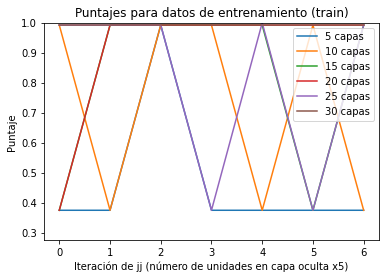

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

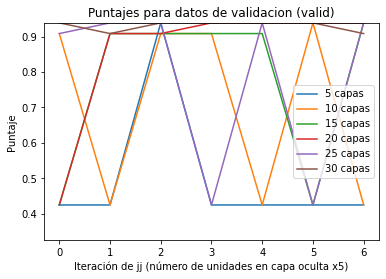

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

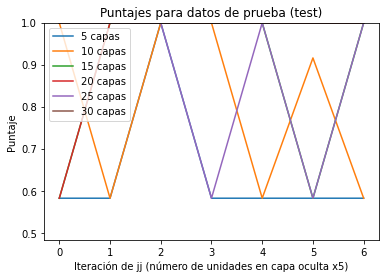

In [ ]:
cont = 5
for a in range(0,len(np.array(scores_train)),1):
  plt.plot(np.array(scores_train)[a], label='%s capas' % cont)
  cont += 5
ax = plt.gca()
ax.set_ylim([np.min(scores_train)-0.1, np.max(scores_train)])
plt.legend()
plt.title('Puntajes para datos de entrenamiento (train)')
plt.ylabel("Puntaje")
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('scores_train.pdf') 
files.download("scores_train.pdf")
plt.show()

cont = 5
for a in range(0,len(np.array(scores_valid)),1):
  plt.plot(np.array(scores_valid)[a], label='%s capas' % cont)
  cont += 5
ax = plt.gca()
ax.set_ylim([np.min(scores_valid)-0.1, np.max(scores_valid)])
plt.legend()
plt.title('Puntajes para datos de validacion (valid)')
plt.ylabel("Puntaje")
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('scores_valid.pdf') 
files.download("scores_valid.pdf")
plt.show()

cont = 5
for a in range(0,len(np.array(scores_test)),1):
  plt.plot(np.array(scores_test)[a], label='%s capas' % cont)
  cont += 5
ax = plt.gca()
ax.set_ylim([np.min(scores_test)-.1, np.max(scores_test)])
plt.legend()
plt.title('Puntajes para datos de prueba (test)')
plt.ylabel("Puntaje")
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('scores_test.pdf') 
files.download("scores_test.pdf")
plt.show()

## Visualización de cambio con respecto a matrices de confusión

Para resultados acertados

In [53]:
sum_correcto_train = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_correcto_train.append(np.trace(np.array(almacenamiento_conf_mat_train)[ii,jj]))
sum_correcto_valid = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_correcto_valid.append(np.trace(np.array(almacenamiento_conf_mat_valid)[ii,jj]))
sum_correcto_test = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_correcto_test.append(np.trace(np.array(almacenamiento_conf_mat_test)[ii,jj]))

print(np.array(sum_correcto_train).transpose())
print(np.array(sum_correcto_valid).transpose())
print(np.array(sum_correcto_test).transpose())

[111  91  75  81  82  74  93 122  83  84  97  98 106 113 112 107 128  98
 118 121  97 113 128 121 122 121 130 128 119 129 130 129 128 128 120 114]
[19 17 19 16 15 17 29 26 23 25 25 28 27 25 29 24 23 30 28 28 26 28 29 29
 29 30 30 30 29 31 29 29 30 30 31 28]
[ 8  7  8  9 10  7 10  8  8 10  8  8 10 10 10 10 10  8  8 10 10 10  9  9
 10 10 10 10  9  9 10 10 10  9  9  9]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

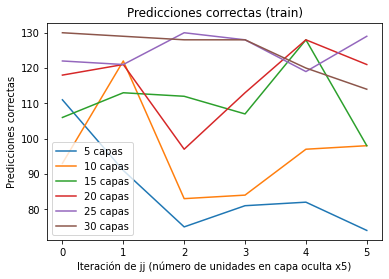

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

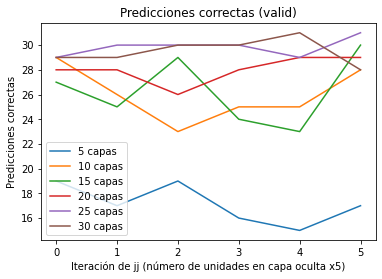

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

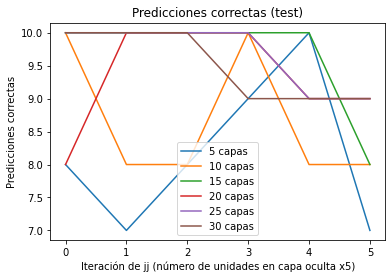

In [ ]:
cont = 5
for a in range(0,len(np.array(sum_correcto_train)),6):
  plt.plot(np.array(sum_correcto_train)[a:a+6], label='%s capas' % cont)
  cont += 5
plt.legend()
plt.title('Predicciones correctas (train)')
plt.ylabel("Predicciones correctas")
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('acertados_train.pdf')
files.download("acertados_train.pdf")
plt.show()

cont = 5
for a in range(0,len(np.array(sum_correcto_valid)),6):
  plt.plot(np.array(sum_correcto_valid)[a:a+6], label='%s capas' % cont)
  cont += 5
plt.legend()
plt.title('Predicciones correctas (valid)')
plt.ylabel("Predicciones correctas")
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('acertados_valid.pdf') 
files.download("acertados_valid.pdf")
plt.show()


cont = 5
for a in range(0,len(np.array(sum_correcto_test)),6):
  plt.plot(np.array(sum_correcto_test)[a:a+6], label='%s capas' % cont)
  cont += 5
plt.legend()
plt.ylabel("Predicciones correctas")
plt.title('Predicciones correctas (test)')
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('acertados_test.pdf')
files.download("acertados_test.pdf")
plt.show()

Para resultados equivocados, se toma la resta de la suma total de los datos en la matriz, restada a los datos correctos

In [54]:
sum_incorrecto_train = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_incorrecto_train.append(np.sum(np.array(almacenamiento_conf_mat_train)[ii,jj])-np.trace(np.array(almacenamiento_conf_mat_train)[ii,jj]))

sum_incorrecto_valid = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_incorrecto_valid.append(np.sum(np.array(almacenamiento_conf_mat_valid)[ii,jj])-np.trace(np.array(almacenamiento_conf_mat_valid)[ii,jj]))

sum_incorrecto_test = []
for ii in range(0,6,1):
  for jj in range(0,6,1):
    sum_incorrecto_test.append(np.sum(np.array(almacenamiento_conf_mat_test)[ii,jj])-np.trace(np.array(almacenamiento_conf_mat_test)[ii,jj]))

print(np.array(sum_incorrecto_train).transpose())
print(np.array(sum_incorrecto_valid).transpose())
print(np.array(sum_incorrecto_test).transpose())

[22 42 58 52 51 59 40 11 50 49 36 35 27 20 21 26  5 35 15 12 36 20  5 12
 11 12  3  5 14  4  3  4  5  5 13 19]
[14 16 14 17 18 16  4  7 10  8  8  5  6  8  4  9 10  3  5  5  7  5  4  4
  4  3  3  3  4  2  4  4  3  3  2  5]
[4 5 4 3 2 5 2 4 4 2 4 4 2 2 2 2 2 4 4 2 2 2 3 3 2 2 2 2 3 3 2 2 2 3 3 3]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

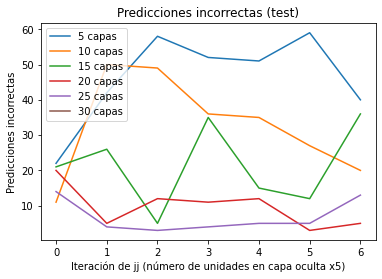

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

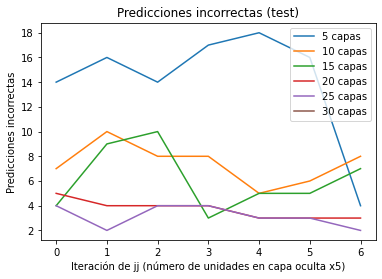

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

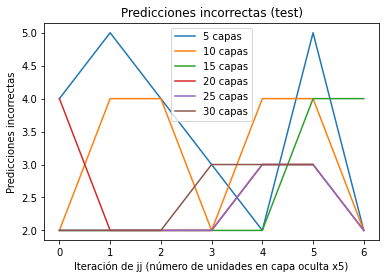

In [ ]:
cont = 0
for a in range(0,len(np.array(sum_incorrecto_train)),7):
  cont += 5
  plt.plot(np.array(sum_incorrecto_train)[a:a+7], label='%s capas' % cont)
plt.legend()
plt.ylabel("Predicciones incorrectas")
plt.title('Predicciones incorrectas (test)')
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('incorrectas_train.pdf')
files.download("incorrectas_train.pdf")
plt.show()

cont = 0
for a in range(0,len(np.array(sum_incorrecto_valid)),7):
  cont += 5
  plt.plot(np.array(sum_incorrecto_valid)[a:a+7], label='%s capas' % cont)
plt.legend()
plt.ylabel("Predicciones incorrectas")
plt.title('Predicciones incorrectas (test)')
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('incorrectas_valid.pdf')
files.download("incorrectas_valid.pdf")
plt.show()

cont = 0
for a in range(0,len(np.array(sum_incorrecto_test)),6):
  cont += 5
  plt.plot(np.array(sum_incorrecto_test)[a:a+7], label='%s capas' % cont)
plt.legend()
plt.ylabel("Predicciones incorrectas")
plt.title('Predicciones incorrectas (test)')
plt.xlabel("Iteración de jj (número de unidades en capa oculta x5)")
plt.savefig('incorrectas_test.pdf')
files.download("incorrectas_test.pdf")
plt.show()

## Notas de asesoría.

Sesgo y varianza, estan relacionados, tiene que ver con el overfitting. Si tiene poco sesgo es porque tiene mucha varianza, y viceversa

Poner en terminos de bajo, medio y alto. 

No es necesario que sea de varios frameworks, con uno basta.}

Se pueden hacer gráficas de como cambia el score.